# This script processes the o2and3 results 

1. Compile o2and3 with:
```
make bin/o2and3
```
2. Run the benchmarking script
```
cd scripts
python3 run_par_optim2and3
```
3. The output that we will process is o2and3_coffee.txt (renamed from o2and3.out)



In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
import sys
from statistics import mean

def tokenize(filename):
    experiment ={}

    with open(filename) as f:
        for line in f:
            tokens = line.split()
            if "Running:" in tokens:
                name=tokens[2].split("/")[3]
                nth=int(tokens[6])
                if name not in experiment:
                    experiment[name]={}
            if 'Quadtree' in tokens:
                experiment[name][nth]=[float(tokens[5])]
            if "STAGE" in tokens:
                experiment[name][nth].append(float(tokens[5]))
            if 'Average:' in tokens:
                experiment[name][nth].append(float(tokens[1]))

    #print(experiment)

    results = {}

    for i in experiment:
        results[i]={}
        for j in experiment[i]:
            results[i][j]={}
            results[i][j]['qtree']=experiment[i][j][0]
            results[i][j]['stage1']=mean(experiment[i][j][1:16:3])
            results[i][j]['stage2']=mean(experiment[i][j][2:16:3])
            results[i][j]['stage3']=mean(experiment[i][j][3:16:3])
            results[i][j]['owm']=experiment[i][j][16]
    return results

res1=tokenize("qmin_wptr_coffee.txt")
res2=tokenize("o2and3_coffee.txt")
res3=tokenize("o2and3_woc_coffee.txt") #Without copies in findValidMin 

#print(results)



In [2]:
for i in res1:
    print("Cloud {} has sequential OWM time = {:.2f}".format(i,res1[i][1]['owm'] ))
for i in res2:
    print("Cloud {} has sequential OWM time = {:.2f}. Speedup with tfm wrt to qmin = {:.2f}.".format(i,res2[i][1]['owm'], res1[i][1]['owm']/res2[i][1]['owm'] ))
for i in res3:
    print("Cloud {} has sequential OWM time = {:.2f}. Speedup with tfm_woc wrt to qmin = {:.2f}.".format(i,res3[i][1]['owm'], res1[i][1]['owm']/res3[i][1]['owm'] ))


Cloud Alcoy has sequential OWM time = 10.52
Cloud Arzua has sequential OWM time = 7.56
Cloud BrionF has sequential OWM time = 5.86
Cloud BrionU has sequential OWM time = 6.51
Cloud Alcoy has sequential OWM time = 8.15. Speedup with tfm wrt to qmin = 1.29.
Cloud Arzua has sequential OWM time = 6.05. Speedup with tfm wrt to qmin = 1.25.
Cloud BrionF has sequential OWM time = 3.21. Speedup with tfm wrt to qmin = 1.82.
Cloud BrionU has sequential OWM time = 3.46. Speedup with tfm wrt to qmin = 1.88.
Cloud Alcoy has sequential OWM time = 6.16. Speedup with tfm_woc wrt to qmin = 1.71.
Cloud Arzua has sequential OWM time = 4.04. Speedup with tfm_woc wrt to qmin = 1.87.
Cloud BrionF has sequential OWM time = 2.22. Speedup with tfm_woc wrt to qmin = 2.64.
Cloud BrionU has sequential OWM time = 2.46. Speedup with tfm_woc wrt to qmin = 2.64.


In [3]:
for i in res1:
    print("Cloud {} has 8-core OWM time = {:.2f}".format(i,res1[i][8]['owm'] ))
for i in res2:
    print("Cloud {} has 8-core OWM time = {:.2f}. Speedup with tfm wrt to qmin = {:.2f}.".format(i,res2[i][8]['owm'], res1[i][8]['owm']/res2[i][8]['owm'] ))
for i in res3:
    print("Cloud {} has 8-core OWM time = {:.2f}. Speedup with tfm wrt to qmin = {:.2f}.".format(i,res3[i][8]['owm'], res1[i][8]['owm']/res3[i][8]['owm'] ))


Cloud Alcoy has 8-core OWM time = 1.69
Cloud Arzua has 8-core OWM time = 1.27
Cloud BrionF has 8-core OWM time = 0.97
Cloud BrionU has 8-core OWM time = 1.12
Cloud Alcoy has 8-core OWM time = 1.55. Speedup with tfm wrt to qmin = 1.09.
Cloud Arzua has 8-core OWM time = 1.14. Speedup with tfm wrt to qmin = 1.12.
Cloud BrionF has 8-core OWM time = 1.74. Speedup with tfm wrt to qmin = 0.56.
Cloud BrionU has 8-core OWM time = 1.96. Speedup with tfm wrt to qmin = 0.57.
Cloud Alcoy has 8-core OWM time = 1.21. Speedup with tfm wrt to qmin = 1.39.
Cloud Arzua has 8-core OWM time = 0.82. Speedup with tfm wrt to qmin = 1.56.
Cloud BrionF has 8-core OWM time = 1.35. Speedup with tfm wrt to qmin = 0.72.
Cloud BrionU has 8-core OWM time = 1.56. Speedup with tfm wrt to qmin = 0.72.


In [4]:
for i in res1:
    print("In qmin cloud {} has quadtree creation time = {:.2f}".format(i,mean(list(res1[i][j]['qtree'] for j in [1,2,4,6,8]))))
for i in res3:
    print("In parallelcpp cloud {} has quadtree creation time = {:.2f}".format(i,mean(list(res3[i][j]['qtree'] for j in [1,2,4,6,8]))))


In qmin cloud Alcoy has quadtree creation time = 3.18
In qmin cloud Arzua has quadtree creation time = 3.75
In qmin cloud BrionF has quadtree creation time = 4.02
In qmin cloud BrionU has quadtree creation time = 4.48
In parallelcpp cloud Alcoy has quadtree creation time = 3.18
In parallelcpp cloud Arzua has quadtree creation time = 3.77
In parallelcpp cloud BrionF has quadtree creation time = 3.98
In parallelcpp cloud BrionU has quadtree creation time = 4.48


# Spedup for each cloud with tfm/parallelcpp version

[1.         1.90737527 2.87084888 4.07541548 5.06675996]
[1.         1.85387122 2.78598524 3.96758668 4.93452236]
[1.         1.57628565 1.77828599 1.78818688 1.64618927]
[1.         1.54306835 1.73354916 1.75042638 1.58354227]


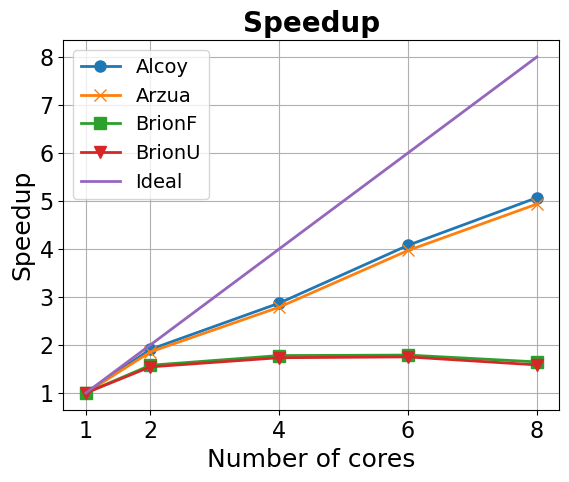

In [5]:
#Configuration variables
titlefs = 20
ylabelfs = 18
xlabelfs = 18
xticksfs = 16
yticksfs = 16
legendfs = 14
linew = 2
markers = 8

fig = plt.figure()

marks=['o-','x-','s-','v-','+-']

for (i,z) in zip(res3,marks):
    print(np.array([res3[i][1]['owm']/res3[i][j]['owm'] for j in [1,2,4,6,8]]))
    plt.plot(np.array([1,2,4,6,8]), np.array([res3[i][1]['owm']/res3[i][j]['owm'] for j in [1,2,4,6,8]]), z, linewidth=linew, markersize=markers)
plt.plot(np.array([1,2,4,6,8]), np.array([1,2,4,6,8]), '-', linewidth=linew, markersize=markers)

sizes=[i for i in res3]
sizes.append('Ideal')
plt.title('Speedup',  fontweight='bold', fontsize=titlefs)
plt.legend(sizes,loc='best', fontsize= legendfs)
plt.ylabel('Speedup', fontsize=ylabelfs)
plt.xlabel('Number of cores', fontsize=xlabelfs)
plt.xticks([1,2,4,6,8],fontsize=xticksfs)
plt.yticks(fontsize=yticksfs)
plt.grid()

plt.show()